# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [29]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

In [30]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [31]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [32]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


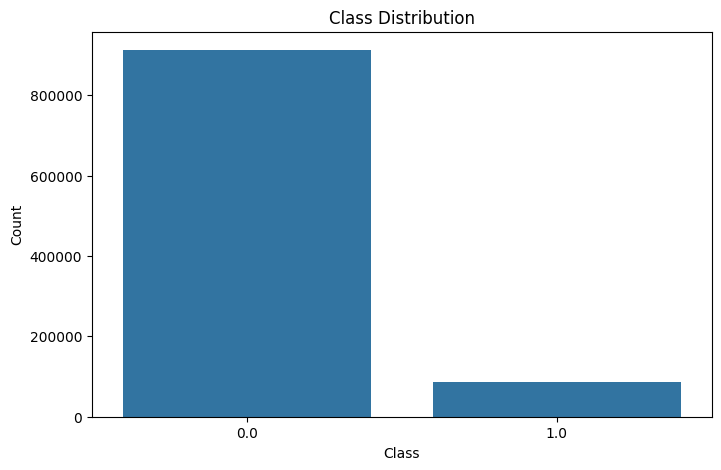

In [33]:
# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='fraud', data=fraud)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [34]:
target = fraud["fraud"]
features = fraud.drop("fraud", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20,random_state=0)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# We don't normalize the true/false features, just the numeric ones.

binary_features = ["repeat_retailer", "used_chip","used_pin_number","online_order"]

numerical_features = X_train.columns.difference(binary_features) # Identify numerical features

# Normalize only the numerical features
normalizer = StandardScaler()
normalizer.fit(X_train[numerical_features])

# Transform the numerical features
X_train_norm = normalizer.transform(X_train[numerical_features])
X_test_norm = normalizer.transform(X_test[numerical_features])

# Convert to DataFrame, keeping the original indices
X_train_norm = pd.DataFrame(X_train_norm, columns=numerical_features, index=X_train.index)
X_test_norm = pd.DataFrame(X_test_norm, columns=numerical_features, index=X_test.index)

# Combine normalized numerical features with unchanged binary features
X_train_norm = pd.concat([X_train_norm, X_train[binary_features]], axis=1)
X_test_norm = pd.concat([X_test_norm, X_test[binary_features]], axis=1)

In [35]:
from sklearn.linear_model import LogisticRegression

# applying Logistical Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_norm, y_train)

LogisticRegression()

In [36]:
logistic_reg.score(X_test_norm, y_test)

0.95909

In [37]:
pred = logistic_reg.predict(X_test_norm)

print(classification_report(y_true=y_test, y_pred = pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182615
         1.0       0.89      0.60      0.72     17385

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



**Oversampling**

In [38]:
train = pd.DataFrame(X_train_norm, columns = X_train.columns)
train["fraud"] = y_train.values
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
760648,-0.357077,-0.150122,-0.423839,1.0,1.0,0.0,1.0,0.0
79333,0.194157,-0.185739,-0.433963,1.0,1.0,0.0,1.0,0.0
771344,0.443734,-0.150915,-0.484329,1.0,0.0,0.0,1.0,0.0
179102,-0.402217,-0.166800,-0.460903,0.0,1.0,0.0,0.0,0.0
75318,-0.070140,-0.185709,-0.414141,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
963395,0.686916,-0.071705,-0.606513,1.0,0.0,0.0,1.0,0.0
117952,-0.359697,0.294316,0.106885,1.0,0.0,0.0,1.0,0.0
435829,0.002457,-0.023525,-0.477266,1.0,0.0,1.0,0.0,0.0
305711,-0.223923,-0.185220,-0.010973,1.0,0.0,0.0,1.0,0.0


In [39]:
fraud_df = train[train["fraud"]==1]
no_fraud_df = train[train["fraud"]==0]

In [40]:
from sklearn.utils import resample

fraud_df_oversampled = resample(fraud_df, n_samples=len(no_fraud_df), replace=True)
train_oversampled = pd.concat([fraud_df_oversampled, no_fraud_df])

In [41]:
train_oversampled["fraud"].value_counts()

fraud
1.0    729982
0.0    729982
Name: count, dtype: int64

In [42]:
y_train_over = train_oversampled["fraud"]
X_train_over = train_oversampled.drop(columns="fraud")


In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [44]:
log_reg.score(X_test_norm, y_test)

0.933995

In [45]:
pred = log_reg.predict(X_test_norm)

print(classification_report(y_true=y_test, y_pred = pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



**Undersampling**

In [46]:
no_fraud_undersampled = resample(no_fraud_df, n_samples=len(fraud_df))

In [47]:
train_under = pd.concat([fraud_df, no_fraud_undersampled])

In [48]:
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
143866,5.750327,-0.177389,0.341349,1.0,0.0,0.0,1.0,1.0
711794,-0.392963,-0.157910,1.319248,0.0,0.0,0.0,0.0,1.0
303370,-0.150089,-0.130154,0.922150,1.0,0.0,0.0,1.0,1.0
71817,-0.408534,2.993662,0.776164,0.0,1.0,0.0,1.0,1.0
44696,1.415853,-0.148294,-0.573715,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
560812,-0.329872,-0.171807,0.277796,1.0,0.0,0.0,1.0,0.0
668612,-0.375162,0.121078,0.303904,1.0,1.0,0.0,1.0,0.0
36461,-0.326121,0.159615,1.390795,1.0,0.0,1.0,1.0,0.0
814414,0.112225,-0.181399,-0.265027,1.0,0.0,1.0,0.0,0.0


In [49]:
y_train_under = train_under["fraud"]
X_train_under = train_under.drop(columns="fraud")

In [50]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train_under, y_train_under)

LogisticRegression()

In [51]:
log_reg2.score(X_test_norm, y_test)

0.933785

In [52]:
pred2 = log_reg2.predict(X_test_norm)

print(classification_report(y_true=y_test, y_pred = pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



**SMOTE**

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
smote = SMOTE(sampling_strategy=1.0)
X_train_sm, y_train_sm = smote.fit_resample(X_train_norm, y_train)

In [55]:
log_reg3 = LogisticRegression()
log_reg3.fit(X_train_sm, y_train_sm)


pred3 = log_reg3.predict(X_test_norm)

print(classification_report(y_true=y_test, y_pred = pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182615
         1.0       0.57      0.95      0.71     17385

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

